# Google play apps dataset - exploratory data analysis

### Universitatea Bucuresti Facultatea de Informatica 

###          Students: Constantin Dinu Vasiliu, Lucian Nut, Daniel Caraulasu

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as gro
from plotly import tools
from statistics import *
#import chart_studio.plotly as ply


# encoder for the nominal categorical values
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics


import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./googleplaystore_user_reviews.csv
./eda-ub-fmi.ipynb
./googleplaystore.csv
./license.txt
./.ipynb_checkpoints/eda-ub-fmi-checkpoint.ipynb



## Project Content


#### General Data Manipulation<br/>
* [Data Import](#data_import)
* [Generic Data Cleaning](#gdc)

#### Cleaning each feature one by one

* [Reviews](#reviews)
* [Size](#size)
* [Installs](#installs)
* [Price](#price)
* [Genre](#genre)

#### Exploratory Data Analysis

* [Pairplot](#pairplot)
* [Rating Histogram](#rating_histogram)
* [Boxplot](#boxplot)
* [Rating by Categories](#rating_by_categories)
* [Pie Chart](#pie_chart)
* [Linear Regression Plot Fits](#lin_reg)

#### Predicting Application Ratings
* [K Nearest Neighbours](#knn)


### <a id="data_import">Data Import</a>

In [2]:
data = pd.read_csv("googleplaystore.csv")
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
data.shape

(10841, 13)

### General dataset information

In [4]:
data.info()
#we see that although there are 10841 rows to the dataset, there are null values amongst
#we want to reduce in order to be able to use the data for prediction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## DATA CLEANING

## <a id="gdc">Generic Data Cleaning</a>

In [5]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent * 100], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

Total    Percent
Rating           1474  15.736095
Current Ver         8   0.073848
Android Ver         3   0.027680
Content Rating      1   0.009225
Type                1   0.009225
Last Updated        0   0.000000
Genres              0   0.000000
Price               0   0.000000
Installs            0   0.000000
Size                0   0.000000
Reviews             0   0.000000
Category            0   0.000000
App                 0   0.000000

By visually inspecting the above table we can see that the highest number of null values is in the variable we will be trying to predict, Rating.

The two strategies that we can use to handle such cases are either dropping the rows with null values or replacing it with a median, or mean value of the column. We have chosen to drop the values so that we don't influence the final accuracy that we will use to compare the learning methods by.

In [6]:
cleaned_data = data.dropna()

# cleaned data
total2 = cleaned_data.isnull().sum().sort_values(ascending=False)
percent2 = (cleaned_data.isnull().sum()/cleaned_data.count()).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
missing_data2.head(15)

Total  Percent
Android Ver         0      0.0
Current Ver         0      0.0
Last Updated        0      0.0
Genres              0      0.0
Content Rating      0      0.0
Price               0      0.0
Type                0      0.0
Installs            0      0.0
Size                0      0.0
Reviews             0      0.0
Rating              0      0.0
Category            0      0.0
App                 0      0.0

In [7]:
# total duplicated entries by the "App" & "Current Ver" columns 1145
t_a_d = cleaned_data[cleaned_data.duplicated(['App', 'Current Ver'])]

print("Number of duplicates {}".format(t_a_d.shape))
print("Expected number of rows after cleanup: {}".format(cleaned_data.shape[0] - t_a_d.shape[0]))

Number of duplicates (1145, 13)
Expected number of rows after cleanup: 8215


In [8]:
# Return DataFrame with duplicate rows removed, optionally only considering certain columns. Indexes, including time indexes are ignored.
cleaned_data = cleaned_data.drop_duplicates(['App', 'Current Ver'])
print("Final table shape without duplicates in 'App' and 'Current Ver': __{}__".format(cleaned_data.shape))

Final table shape without duplicates in 'App' and 'Current Ver': __(8215, 13)__


In [9]:
# Just replace whitespaces with underscore in the headers
cleaned_data.columns = cleaned_data.columns.str.replace(' ', '_')

### Cleaning each feature one by one

### <a id='reviews'>Reviews</a>

In [10]:
# display first 10 number of reviews
cleaned_data['Reviews'].head(10)

0       159
1       967
2     87510
3    215644
4       967
5       167
6       178
7     36815
8     13791
9       121
Name: Reviews, dtype: object

In [11]:
# Let's change each review to int
cleaned_data['Reviews'] = cleaned_data['Reviews'].apply(lambda review: int(review))

### <a id='size'>Size</a>

In [12]:
# display first 10 sizes
cleaned_data['Size'].head(10)

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
5    5.6M
6     19M
7     29M
8     33M
9    3.1M
Name: Size, dtype: object

In [13]:
# Size Frequencies
cleaned_data.Size.value_counts().head(10) # 10 rows selected 

Varies with device    1174
14M                    148
12M                    147
11M                    143
13M                    143
15M                    139
17M                    117
25M                    113
21M                    106
16M                    106
Name: Size, dtype: int64

In [14]:
redundant_string = 'Varies with device'

print("There are a total of {} rows with the 'Size' column containing '{}' string.".format(cleaned_data.loc[cleaned_data['Size'] == redundant_string].shape[0], redundant_string))

# Let's replace the redundant string with the median of the Size column, because the number of values that have the redundant string is pretty high and we wouldn't want to loose that data

median_value=median(cleaned_data['Size'])
print (median_value)
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda x: str(x).replace(redundant_string, median_value) if redundant_string in str(x) else x)

print("There are a total of {} rows with the 'Size' column containing '{}' string.".format(cleaned_data.loc[cleaned_data['Size'] == redundant_string].shape[0], redundant_string))

There are a total of 1174 rows with the 'Size' column containing 'Varies with device' string.
4.2M
There are a total of 0 rows with the 'Size' column containing 'Varies with device' string.


Let's remove M from the size and also divide each number followed by k wtih 1000 while also removing k.

In [15]:
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda size: str(size).replace('M', '') if 'M' in str(size) else size)
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda size: str(size).replace(',', '') if 'M' in str(size) else size)

# we remove k but we also divide it by 1000 to have a standardized column for the application sizes
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda size: float(str(size).replace('k', '')) / 1000 if 'k' in str(size) else size)

In [16]:
cleaned_data['Size'] = cleaned_data['Size'].apply(lambda size: float(size))
cleaned_data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content_Rating  \
0      159  19.0      10,000+  Free     0       Everyone   
1      967  14.0     500,000+  Free     0       Everyone   
2    87510   8.7   5,000,000+  Free     0       Everyone   
3   215644  25.0  50,000,000+  Free     0           Teen   
4      967   2.8     100,000+  Free     0       Everyone   

                      Genres      Last_Updated         Current_Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android_Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

As we can observe above all the sizes in our dataset are now set to a standard measurement data, which is megabytes

### <a id='installs'>Installs</a>

In [17]:
# display first 10 total installs
cleaned_data['Installs'].head(10)

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
5        50,000+
6        50,000+
7     1,000,000+
8     1,000,000+
9        10,000+
Name: Installs, dtype: object

In [18]:
# Install Frequencies
cleaned_data.Installs.value_counts().head(10) # 10 rows selected 

1,000,000+     1419
100,000+       1097
10,000+         987
10,000,000+     945
1,000+          696
5,000,000+      610
500,000+        503
50,000+         456
5,000+          424
100+            303
Name: Installs, dtype: int64

In [19]:
# We remove the signs from the installs column

cleaned_data['Installs'] = cleaned_data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
cleaned_data['Installs'] = cleaned_data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
cleaned_data['Installs'] = cleaned_data['Installs'].apply(lambda x: int(x))

Removing the + here is a very logical operation, as this it wouldn't be in a numeric format with the pluses and this is just the format that Google Play uses, it wouldn't bring any additional information that we could use in the regression


### <a id='price'>Price</a>

In [20]:
# display first 5 prices
print(cleaned_data['Price'].head(5))

# display first 5 prices with a value bigger than 0
print(cleaned_data[cleaned_data['Price'] != 0]['Price'].head(5))

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object


In [21]:
paid_apps = cleaned_data[cleaned_data.Price != '0'].shape[0]
print("Total free apps {}".format(cleaned_data.shape[0]- paid_apps))
print("Total paid apps {}".format(paid_apps))

Total free apps 7613
Total paid apps 602


In [22]:
cleaned_data['Price'] = cleaned_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
cleaned_data['Price'] = cleaned_data['Price'].apply(lambda x: float(x))


Removing the $ sign as done to other columns so we can have a numeric column

### <a id='genre'>Genre</a>

In [23]:
# display first 5 genres
print(cleaned_data['Genres'].head(5))

0                 Art & Design
1    Art & Design;Pretend Play
2                 Art & Design
3                 Art & Design
4      Art & Design;Creativity
Name: Genres, dtype: object


In [24]:
result = cleaned_data[cleaned_data.Genres == 'Adventure;Action & Adventure']
genres = np.unique(cleaned_data['Genres'])
print("There are a total of {} initial genres".format(genres.shape[0]))

There are a total of 115 initial genres


It is obvious that some of the genres must be combined with others..
This is a good example of inconsistent data which must be cleaned

In [25]:
# The idea is that we want to reduce redudant genres or combine 
# the ones which are of the same genre but are marked with different ones;
# More can be added / mixed together; There is no rule but it is about having some sort of a
# correct intuition which is needed in order to logically group them together;
new_genres = {
'Adventure;Action & Adventure'  :  'Action;Action & Adventure',
'Educational;Action & Adventure' : 'Action & Adventure',
'Adventure;Brain Games'   :  'Adventure',
'Adventure;Education'   : 'Adventure',
'Arcade;Pretend Play'   : 'Arcade',
'Art & Design;Pretend Play' : 'Art & Design;Creativity',
'Board;Pretend Play'  : 'Board;Brain Games',
'Books & Reference'  : 'Education',
'Communication;Creativity' : 'Communication',
'Educational;Education'   : 'Education',
'Educational' : 'Education',
'Educational;Brain Games': 'Education;Brain Games',
'Educational;Creativity': 'Education;Creativity',
'Educational;Pretend Play': 'Education;Pretend Play',
'Music;Music & Video' : 'Music',
'Lifestyle;Pretend Play': 'Lifestyle',
'Simulation;Education': 'Simulation',
'Simulation;Pretend Play' : 'Simulation' 
}

for old, new in new_genres.items():
    print("Replacing [{}] GENRE with [{}] GENRE".format(old, new))
    cleaned_data['Genres'] = cleaned_data['Genres'].apply(lambda x: x.replace(old, new) if old in str(x) else x)


Replacing [Adventure;Action & Adventure] GENRE with [Action;Action & Adventure] GENRE
Replacing [Educational;Action & Adventure] GENRE with [Action & Adventure] GENRE
Replacing [Adventure;Brain Games] GENRE with [Adventure] GENRE
Replacing [Adventure;Education] GENRE with [Adventure] GENRE
Replacing [Arcade;Pretend Play] GENRE with [Arcade] GENRE
Replacing [Art & Design;Pretend Play] GENRE with [Art & Design;Creativity] GENRE
Replacing [Board;Pretend Play] GENRE with [Board;Brain Games] GENRE
Replacing [Books & Reference] GENRE with [Education] GENRE
Replacing [Communication;Creativity] GENRE with [Communication] GENRE
Replacing [Educational;Education] GENRE with [Education] GENRE
Replacing [Educational] GENRE with [Education] GENRE
Replacing [Educational;Brain Games] GENRE with [Education;Brain Games] GENRE
Replacing [Educational;Creativity] GENRE with [Education;Creativity] GENRE
Replacing [Educational;Pretend Play] GENRE with [Education;Pretend Play] GENRE
Replacing [Music;Music & V

In [26]:
# just checking the results here 
cleaned_data[cleaned_data.Genres == 'Art & Design;Creativity']

App        Category  Rating  \
1                                 Coloring book moana  ART_AND_DESIGN     3.9   
4               Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
9                       Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   
26                      Colorfit - Drawing & Coloring  ART_AND_DESIGN     4.7   
36     UNICORN - Color By Number & Pixel Art Coloring  ART_AND_DESIGN     4.7   
43                                      Paint Splash!  ART_AND_DESIGN     3.8   
10438                  Dolphin and fish coloring book          FAMILY     3.9   

       Reviews  Size  Installs  Type  Price Content_Rating  \
1          967  14.0    500000  Free    0.0       Everyone   
4          967   2.8    100000  Free    0.0       Everyone   
9          121   3.1     10000  Free    0.0       Everyone   
26       20260  25.0    500000  Free    0.0       Everyone   
36        8145  24.0    500000  Free    0.0       Everyone   
43        2206   1.2    100000  Free    0.0       Everyone   
10438     2249   4.2    500000  Free    0.0       Everyone   

                        Genres      Last_Updated         Current_Ver  \
1      Art & Design;Creativity  January 15, 2018               2.0.0   
4      Art & Design;Creativity     June 20, 2018                 1.1   
9      Art & Design;Creativity      July 3, 2018                 2.8   
26     Art & Design;Creativity  October 11, 2017               1.0.8   
36     Art & Design;Creativity    August 2, 2018               1.0.9   
43     Art & Design;Creativity    April 15, 2018                1.46   
10438  Art & Design;Creativity      May 15, 2018  Varies with device   

        Android_Ver  
1      4.0.3 and up  
4        4.4 and up  
9      4.0.3 and up  
26     4.0.3 and up  
36       4.4 and up  
43       4.1 and up  
10438    4.1 and up

In [27]:
final_data = cleaned_data.copy()

## Exploratory Data Analysis

### <a id="pairplot">Pairplot -  analysis used to identify patterns or associations between features.</a>

/Users/lucian.nut/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/lucian.nut/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



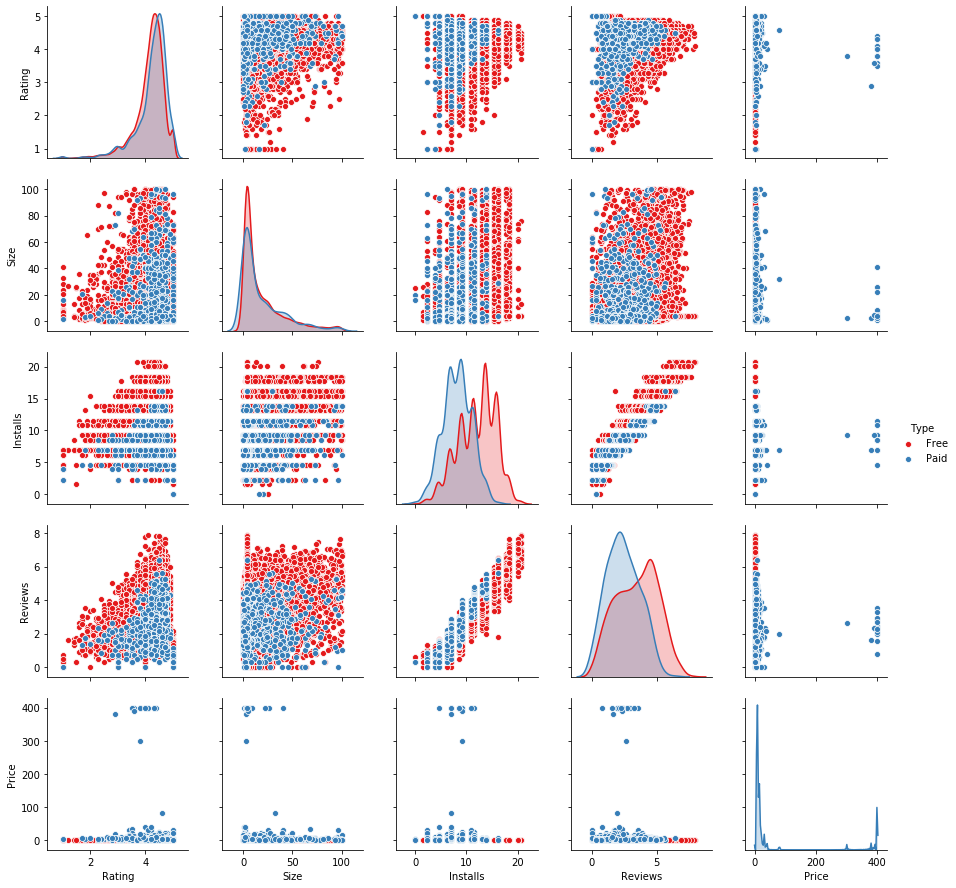

In [28]:
installs = final_data['Installs'][final_data.Installs !=0]
reviews = final_data['Reviews'][final_data.Reviews !=0]
app_type = final_data['Type']
price = final_data['Price']

# we will use log to better represent the number of installs and reviews
p = sns.pairplot(pd.DataFrame(list(zip(final_data['Rating'], 
                                       final_data['Size'], 
                                       np.log(installs), 
                                       np.log10(reviews), 
                                       app_type, 
                                       price)), 
                columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), 
                hue='Type', palette="Set1")

### <a id="rating_histogram">Rating Histogram</a>

In [29]:
avg_rating = gro.Histogram(
    
    x=final_data.Rating,
    name='Average Rating',
    xbins = {'start': 1, 'size': 0.1, 'end' :5},
    marker=dict(
        color='#546FDE',
    ),
    opacity=0.75
)

fig = tools.make_subplots(rows=1, cols=1)
fig.append_trace(avg_rating, 1, 1)
fig.show()

print('Average Rating {}'.format(np.mean(final_data['Rating'])))
print('Mean Rating {}'.format(np.median(final_data['Rating'])))

/Users/lucian.nut/opt/anaconda3/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Average Rating 4.173840535605602
Mean Rating 4.3


We see that most of the apps, the big numbers are somewhere around the 4.5 rating, and the average rating for the entire dataset is 4.17 stars  and the mean rating is 4.3 stars


### <a id="boxplot">Boxplot</a>

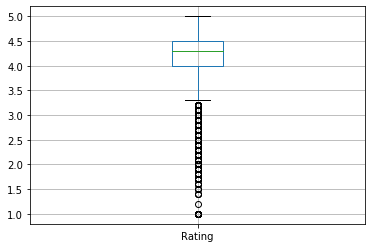

In [30]:
plt.figure()
redundant = cleaned_data.boxplot(['Rating'])

### <a id="rating_by_categories">Rating by Categories</a>

In [31]:
list_of_categories = final_data['Category'].unique().tolist()

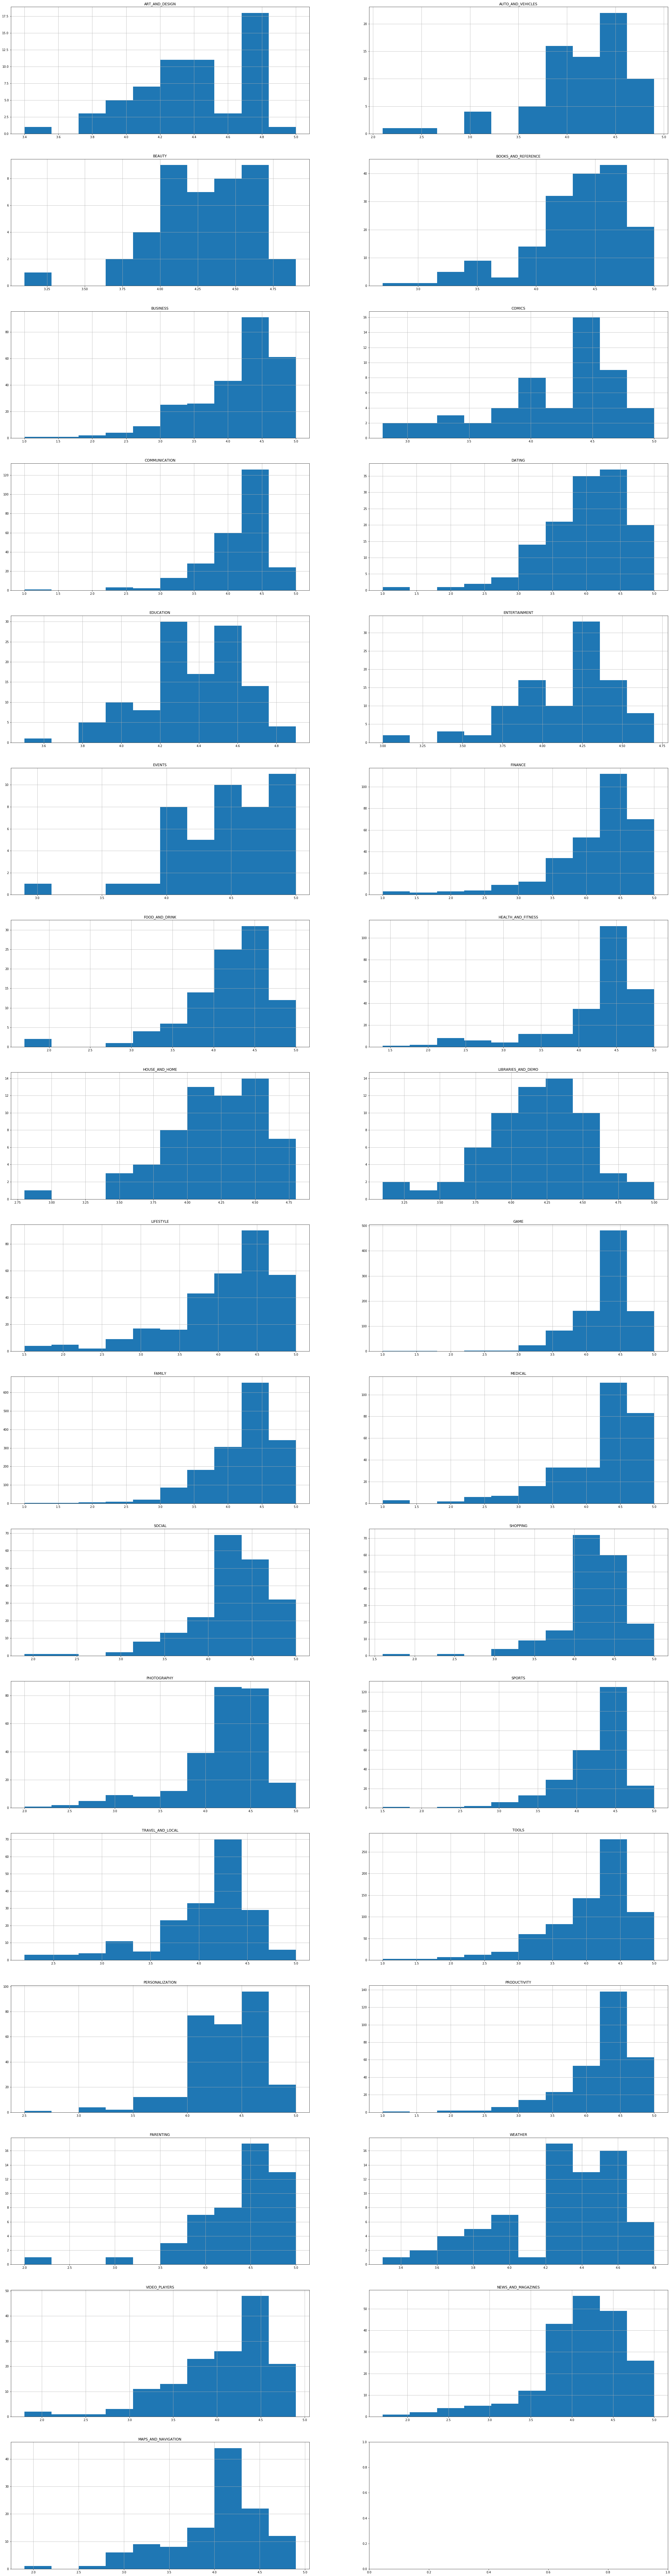

In [32]:
fig, axes = plt.subplots(nrows = 17, ncols = 2)

fig.set_figheight(160)
fig.set_figwidth(40)

c = 0

for row in range(0, axes.shape[0]):
    for column in range(0, axes.shape[1]):
        if c == len(list_of_categories):
            break
        current_subplot = axes[row, column]
        category = list_of_categories[c]
        filtered = final_data.loc[final_data['Category'] == category]['Rating']
        current_subplot.hist(filtered)
        current_subplot.title.set_text(category)
        current_subplot.grid()
        c += 1


### <a id="pie_chart">Pie Chart</a>
We try to see what categories of apps are most popular in our dataset, Family and Games seem to be the most popular, Tools being on the first place. The other percentages are divided across a vast number of categories.


In [33]:
counts = final_data['Category'].value_counts()

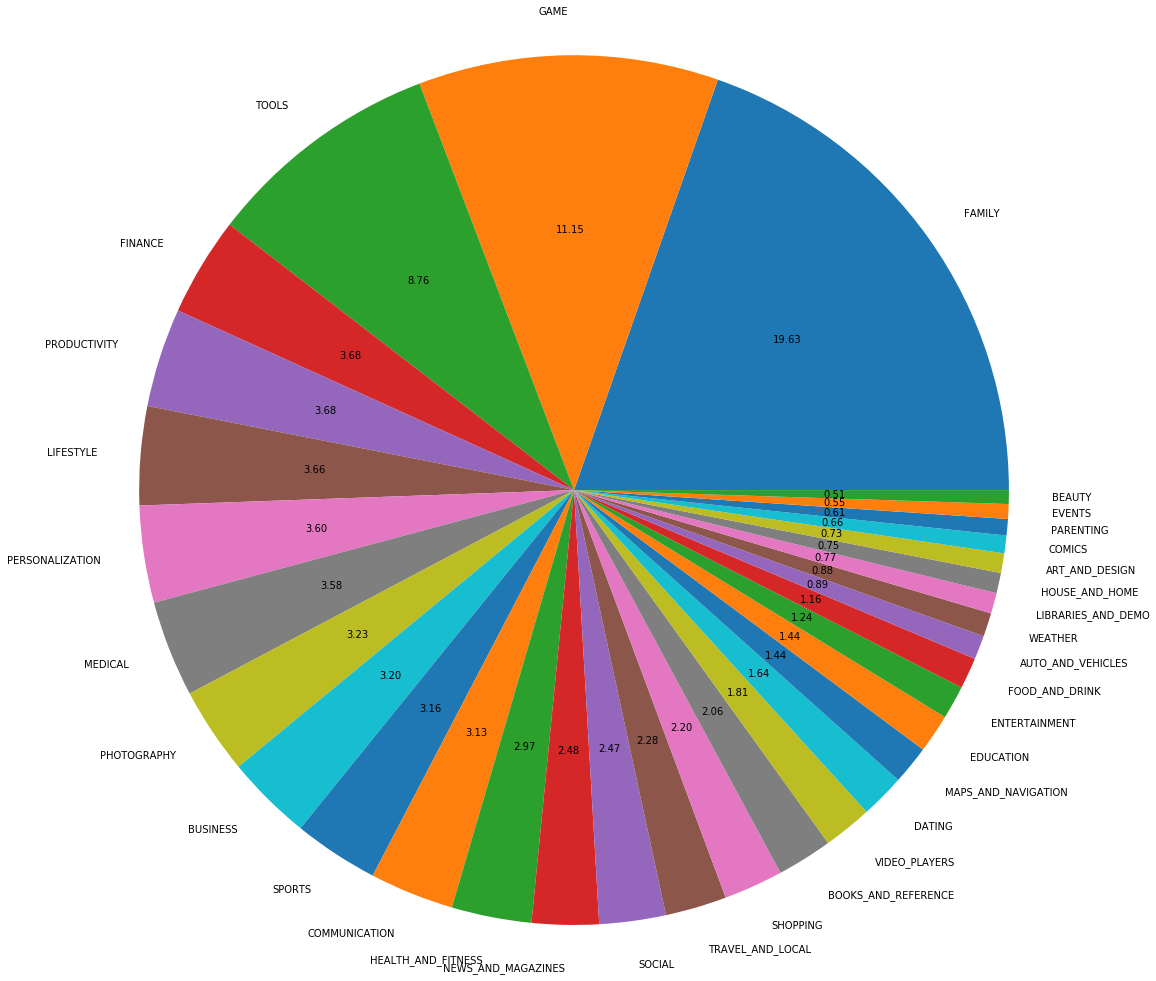

In [34]:
dict_counts=counts.to_dict()
z = plt.pie([float(v) for v in dict_counts.values()], labels=[str(k) for k in dict_counts],radius=5, autopct='%.2f')

### <a id="lin_reg">Linear Regression Plot Fits</a>

Text(0.5, 1.0, 'Influence of Reviews on Rating')

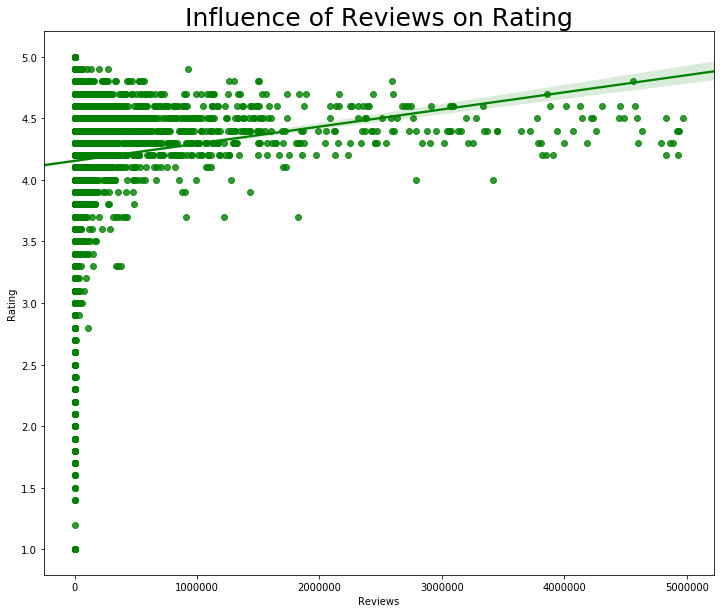

In [35]:
plt.figure(figsize = (12,10))
#print(final_data[final_data['Reviews']>=5000000].count()[0]) -result is 83
sns.regplot(x="Reviews", y="Rating", color = 'green',data=final_data[final_data['Reviews']<=5000000]);
plt.title('Influence of Reviews on Rating',size = 25)


We apply a filter on the applications, to keep just those with <5 000 000 ratings as there are very few that have more than that (83) apps, some of these few having incredibly high numbers of reviews and it would distort the graph, all the points would be very crowded and it wouldn't be as clear.

We can observe a basic tendency, that applications with more reviews also get higher ratings. This is a logical finding as you would presume that apps that are used a lot by people would be good apps.

We should assume that reviews will be a good predictor for rating.

Text(0.5, 1.0, 'Influence of Installs on Rating')

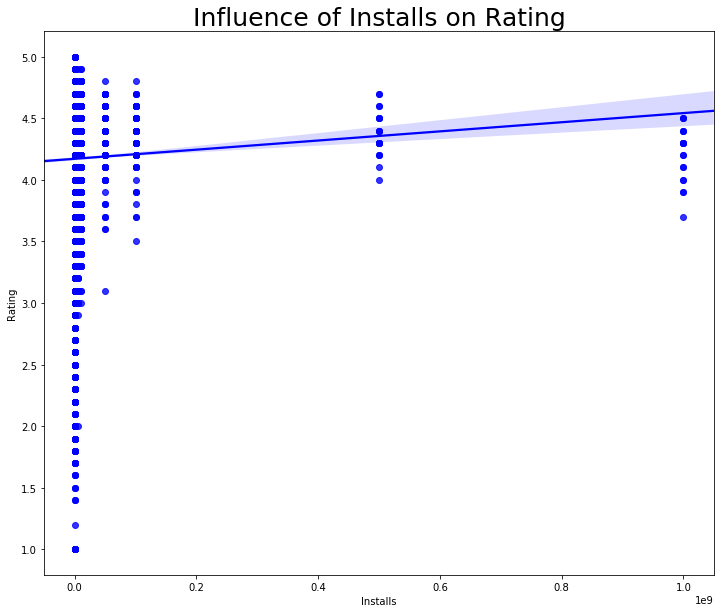

In [36]:
plt.figure(figsize = (12,10))

sns.regplot(x="Installs", y="Rating", color = 'blue',data=final_data);
plt.title('Influence of Installs on Rating',size = 25)


Here we do the same analysis as above, we see the points being just on specific lines and this does make sense since Google Play doesn't tell you the exact number of installs but rather if it is above a threshold.

The tendendcy is similar to what we have seen in the Reviews, apps with high numbers of Installs will be generally more well received and have a higher rating. Popular apps are better rated.


Text(0.5, 1.0, 'Influence of Price on Rating')

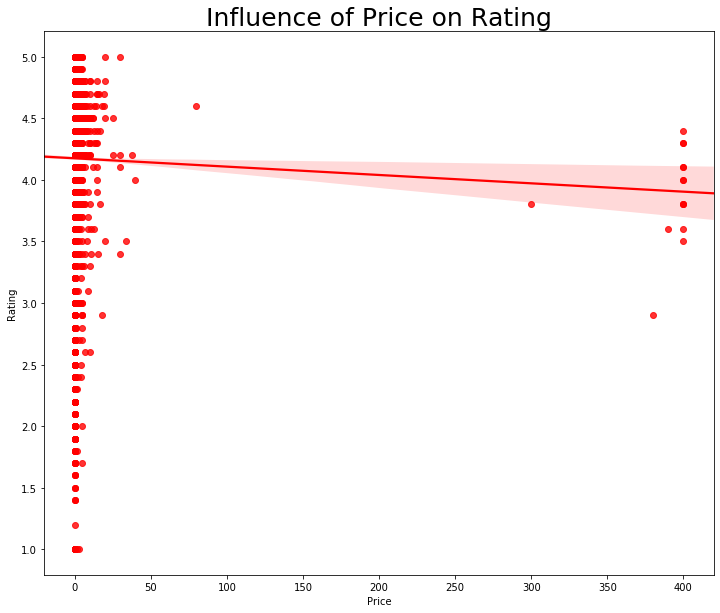

In [37]:
plt.figure(figsize = (12,10))

sns.regplot(x="Price", y="Rating", color = 'red',data=final_data);
plt.title('Influence of Price on Rating',size = 25)

It is very interesting that here we observe the inverse tendency of what we have observed in the previous two analysis. 

People seem to want more from apps with bigger price tags and thus apps with higher prices get ratings smaller than those that are free or cost a small amount.

Text(0.5, 1.0, 'Influence of when app was Last Updated on Rating')

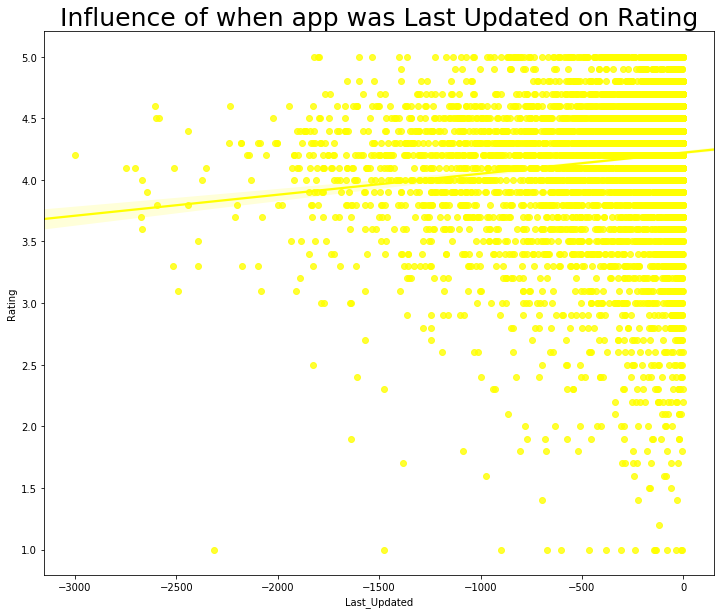

In [38]:
plt.figure(figsize = (12,10))
copy_data=final_data.copy()
copy_data['Last_Updated'] = (pd.to_datetime(final_data['Last_Updated']) -  pd.to_datetime(final_data['Last_Updated']).max()).dt.days
copy_data['Last_Updated'].head()
sns.regplot(x="Last_Updated", y="Rating", color = 'yellow',data=copy_data);
plt.title('Influence of when app was Last Updated on Rating',size = 25)

#we copy the data to a new array, since we want to do some editing, we want to see if there is a correlation between the last update date of the application
#and its rating, but for this we need to have that date in a kind of numeric format, so we change it to the number of days
#there have been from the last update compared to the most recently updated app

Analyzing the data, we can also see a  correlation between when the app was last updated and its rating. It makes sense since apps where the developers keep working recieve better ratings since they implement the user feedback, but abandoned apps remain with bugs, etc. and receive bad ratings.

### <a id="prediction">Predicting Application Ratings</a>

We first need to define a function that will calculate how well our algorithms perform, so we can measure their performance


In [39]:
#using a function to evaluate the accuracy will give us a standardised metric to pass all our methods through
#so we can know which one performed best
def AccuracyMetrics(dataset_y, predicted_y):
    print ('mean squared error: '+ str(metrics.mean_squared_error(dataset_y,predicted_y)))
    print ('mean absolute error: '+ str(metrics.mean_absolute_error(dataset_y,predicted_y)))
    print ('mean squared log error: '+ str(metrics.mean_squared_log_error(dataset_y,predicted_y)))

### <a id="knn">K Nearest Neighbours</a>